# Importing  libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import kurtosis,skew 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Importing Dataset

In [99]:
df=pd.read_excel('train.xlsx')

In [100]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#                                  Data Preprocessing

In [101]:
# Row data descriptive stats
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [102]:
# Observations:
# There is lot of imbalance in the dataset as we can observe: 
#   a. The scales of collegeGPA are different,
#     b. There is some right skewness is salary distribution as there is difference between mean and median of salary,
#     c. Columns like ID, collegeID,collegeTier,collegeCityID,CollegeCityTier doestn't making any sense to measure them, 
#     d. lots of impurity in some columns i.e they contain (nan,-1) values.

In [103]:
# Columns name
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

Dropping unnecessary columns

In [104]:
# create a copy of df (raw data)
df1=df.copy()


# Dropping target features except salary since they are unnecessary for our analysis.

drop_target=['DOJ', 'DOL', 'Designation', 'JobCity']

# Dropping some unnecessary features 
drop_features=['Unnamed: 0', 'ID', 'CollegeID', 'CollegeCityID']

# Drop
df1.drop((drop_target + drop_features),axis=1,inplace=True)


In [105]:

Rows_df=df.shape[0]
Columns_df=df.shape[1]
print("There are {} Number of Rows & {} Number of Columns in df(row) Dataset".format(Rows_df,Columns_df))
print('\n')
Rows_df1=df1.shape[0]
Columns_df1=df1.shape[1]
print("After droping some columns there are {} Number of Rows & {} Number of Columns in df1 Dataset"
      .format(Rows_df1,Columns_df1))


There are 3998 Number of Rows & 39 Number of Columns in df(row) Dataset


After droping some columns there are 3998 Number of Rows & 31 Number of Columns in df1 Dataset


In [106]:
# columns used for model building (after dropping unnecessary columns)
Features = ['Gender', 'DOB', '10percentage', '10board', '12graduation','12percentage', '12board', 'CollegeTier', 'Degree',
            'Specialization', 'collegeGPA', 'CollegeCityTier','CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
            'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon','ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
            'TelecomEngg','CivilEngg', 'conscientiousness','agreeableness', 'extraversion', 'nueroticism',
            'openess_to_experience']

Target= ['Salary']

Data type Treatment

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 31 columns):
Salary                   3998 non-null int64
Gender                   3998 non-null object
DOB                      3998 non-null datetime64[ns]
10percentage             3998 non-null float64
10board                  3998 non-null object
12graduation             3998 non-null int64
12percentage             3998 non-null float64
12board                  3998 non-null object
CollegeTier              3998 non-null int64
Degree                   3998 non-null object
Specialization           3998 non-null object
collegeGPA               3998 non-null float64
CollegeCityTier          3998 non-null int64
CollegeState             3998 non-null object
GraduationYear           3998 non-null int64
English                  3998 non-null int64
Logical                  3998 non-null int64
Quant                    3998 non-null int64
Domain                   3998 non-null float64
ComputerProgram

In [108]:
# converting menctioned columns into category dtype
df1[['Gender','10board','12board','CollegeTier', 'Degree','Specialization','CollegeCityTier','CollegeState']]=df1[['Gender','10board','12board','CollegeTier', 'Degree','Specialization','CollegeCityTier','CollegeState']].astype('category')
 

In [109]:
df1.dtypes

Salary                            int64
Gender                         category
DOB                      datetime64[ns]
10percentage                    float64
10board                        category
12graduation                      int64
12percentage                    float64
12board                        category
CollegeTier                    category
Degree                         category
Specialization                 category
collegeGPA                      float64
CollegeCityTier                category
CollegeState                   category
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64
ComputerScience                   int64
MechanicalEngg                    int64
ElectricalEngg                    int64
TelecomEngg                       int64


Domain Analysis

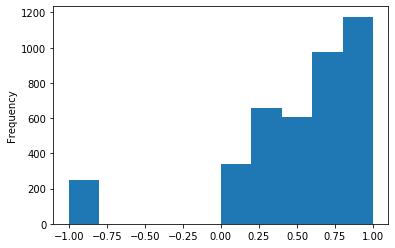

In [110]:
df1.Domain.plot(kind='hist')
plt.show()

In [111]:
# As Domain column is creating Noise in the Data, and we have already have the branch wise marks distribution therefore, 
# Dropping the domain column seems to be an optimal approach.

In [112]:
df1.drop('Domain',axis=1,inplace=True)

Missing values Treatment

In [113]:
# Replacing '-1' and 'NaN' with 0

df1.isin([-1, 'NaN']).sum()

Salary                      0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
dtype: int64

In [114]:
engineering_scores=['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
               'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

for i in engineering_scores:
    df1[i].replace(to_replace = -1, value = 0, inplace = True)

print(df1.isin([-1, 'NaN']).sum())

Salary                   0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64


Bringing the CGPA to  0-100 scale

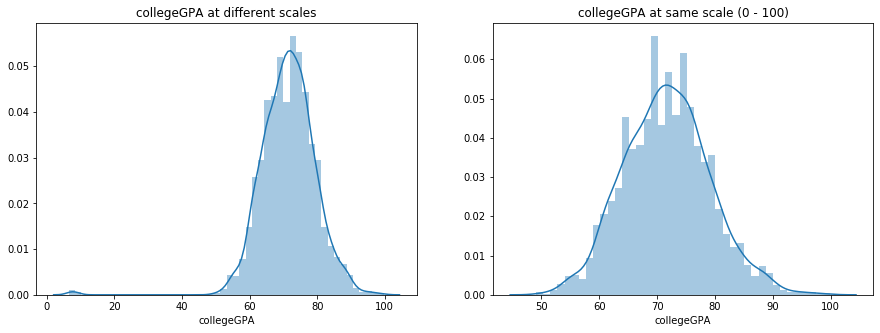

Skewness : 0.16994031794486156
Kurtosis : 0.08006424149767177

MEan : 71.69572786393196
Median : 71.8
Standard deviation : 7.406630923990481


In [115]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df1['collegeGPA'],ax=axes[0])
axes[0].set_title('collegeGPA at different scales')



df1.loc[df1['collegeGPA']<=10,'collegeGPA']*=10
sns.distplot(df1['collegeGPA'],ax=axes[1])
axes[1].set_title('collegeGPA at same scale (0 - 100)')
plt.show()

print('Skewness :',df1['collegeGPA'].skew())
print('Kurtosis :',df1['collegeGPA'].kurt())
print()
print('MEan :',df1['collegeGPA'].mean())
print('Median :',df1['collegeGPA'].median())
print('Standard deviation :',df1['collegeGPA'].std())

In [116]:
fig.savefig("collegegpa.png", dpi=200)

In [117]:
# Observation:
# collegeGPA markes are normaly distributed and on an average most of the candidates scores around 71.6 %. 

Groupting different specialization into core disciplines

Number of unique Specialization : 46

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
chemical engineering                        

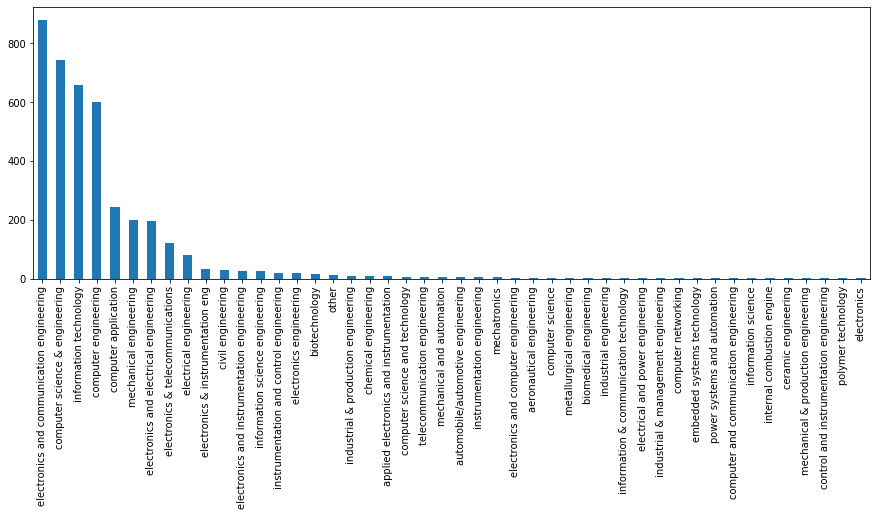

In [118]:
print("Number of unique Specialization :",df1['Specialization'].nunique())
print()
print(df1['Specialization'].value_counts())
print()
specialization_freq = df1['Specialization'].value_counts()
specialization_freq.plot(kind = 'bar', figsize = (15, 5))
plt.show()

In [119]:
# Observation:
# There are 46 specialization classes but the names of some classes seems similar and some of them have very few records, 
# so we are making groups of similar specialization classes and put some of them in other specialization as they have very few records.

# group names: 
# EC = Electronic and Communication
# CS = Computer Science
# other = All other specializations

In [120]:
specialization_group =\
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'other',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'other',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'other',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'other',
 'automobile/automotive engineering' : 'other',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'other',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'other',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'other',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'other',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'other',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'other',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

['CS' 'EC' 'other']

CS       2289
EC       1319
other     390
Name: Specialization, dtype: int64



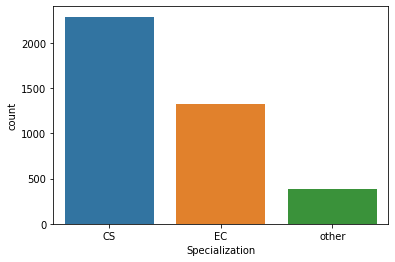

In [121]:
df1['Specialization'] = df1['Specialization'].map(specialization_group)

print(df1['Specialization'].unique())
print()
print(df1['Specialization'].value_counts())

print()
sns.countplot(df1['Specialization'])

plt.show()

In [122]:
fig.savefig("specilization.png", dpi=200)

Analysing Salary distribution

mean markes scored  307699.8499249625
median markes scored 300000.0

Skewness: 6.44866054831297
Kurtosis: 80.82731823061802



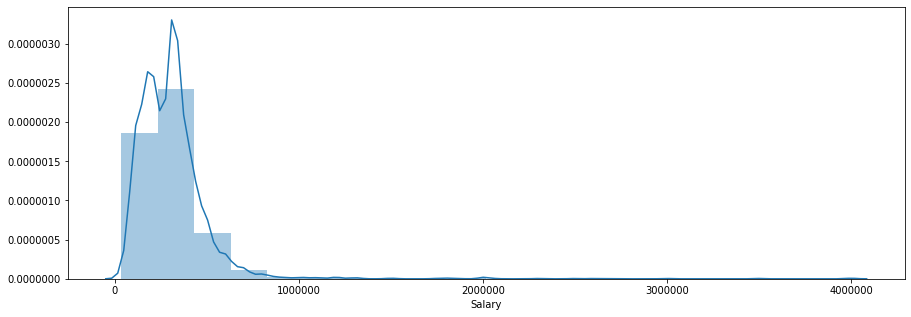

In [123]:
print('mean markes scored ',df1['Salary'].mean())
print('median markes scored',df1['Salary'].median())

print()

print('Skewness:',skew(df1['Salary']))
print('Kurtosis:',kurtosis(df1['Salary']))

print()

plt.figure(figsize=(15,5))
sns.distplot(df1['Salary'],bins=20, kde=True,hist=True)
plt.show()

In [124]:
# Observation:
# Salary of employees is not normally distributed i.e there is a right skewness in salary as there are outliers exist the 
# dataset and the kurtosis is very high as mostly employees got there starting package of Rs 300000

mean markes scored  285447.1586526099
median markes scored 300000.0

Skewness: 0.43205376284764696
Kurtosis: -0.2651888576188304



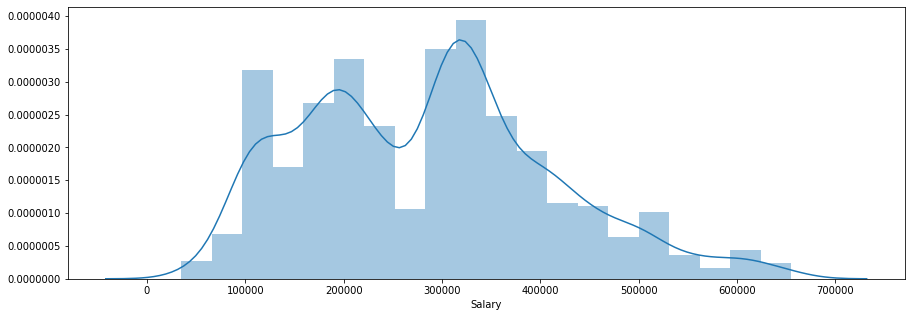

In [125]:
Q1=df1['Salary'].quantile(0.25)
Q2=df1['Salary'].quantile(0.5)
Q3=df1['Salary'].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
df1=df1[df1['Salary']<=UL]

print('mean markes scored ',df1['Salary'].mean())
print('median markes scored',df1['Salary'].median())

print()

print('Skewness:',skew(df1['Salary']))
print('Kurtosis:',kurtosis(df1['Salary']))

print()

plt.figure(figsize=(15,5))
sns.distplot(df1['Salary'],bins=20, kde=True,hist=True)
plt.show()

Analysing age of candidates vs salary: 

In [126]:
# Analysis only on the bases of years

df1['DOByear']=df1['DOB'].dt.year # Date of birth year
df1.drop(columns=['DOB'],axis=1,inplace=True)
df1=df1[df1['DOByear']>1977]

# Creating new features to calculate the age of candidates after completing graduation.
df1['GradAge']=abs(df1['GraduationYear']-df1['DOByear'])


In [127]:
(df1['GradAge']==1991).value_counts()

False    3887
True        1
Name: GradAge, dtype: int64

In [128]:
df1['GradAge'].unique()

array([  21,   23,   22,   24,   26,   28,   20,   25,   19,   17,   27,
         29, 1991], dtype=int64)

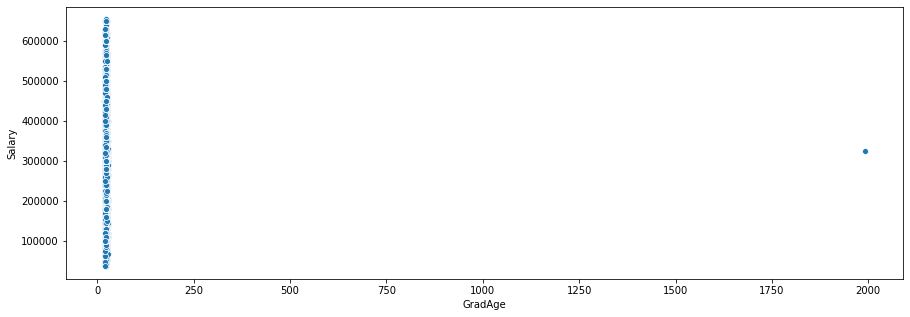

In [129]:
plt.figure(figsize=(15,5))
sns.scatterplot(df1['GradAge'],df1['Salary'])
plt.show()

In [130]:
# Observation:
# there is a missing value in graduation year so i am imputing median value of graduation year in that place

In [131]:
df1['GraduationYear'].replace(to_replace = 0, value = 2013, inplace = True)

In [132]:
df1['GradAge']=abs(df1['GraduationYear']-df1['DOByear'])

In [133]:
df1=(df1[df1['GradAge']>19])
df1= (df1[df1['GradAge']<29])

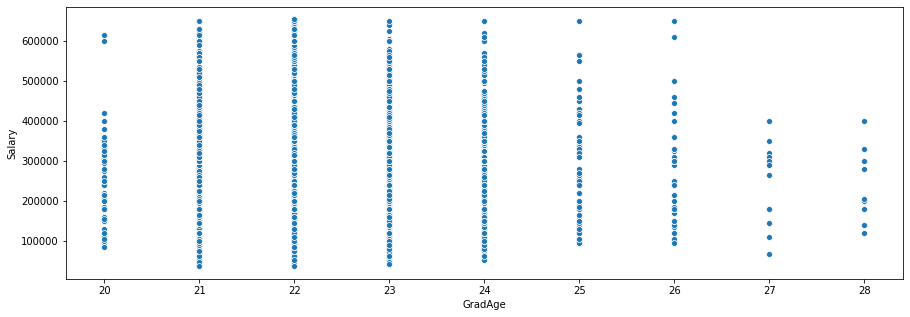

In [134]:
plt.figure(figsize=(15,5))
sns.scatterplot(df1['GradAge'],df1['Salary'])
plt.show()

In [135]:
#Now we can remove Graduation Year column

In [136]:
df1.drop('GraduationYear',axis=1,inplace=True)

Dividing 12board into different groups: 

In [137]:
print(df1['12board'].value_counts())

cbse                                               1360
state board                                        1237
0                                                   342
icse                                                127
up board                                             82
                                                   ... 
up bord                                               0
board of intermediate,ap                              0
up board allahabad                                    0
maharashtra state board mumbai divisional board       0
intermideate                                          0
Name: 12board, Length: 340, dtype: int64


In [138]:

#df.loc[(df['12board'] == 'cbse') & (df['10board']==0), ['10board']] = 'cbse'

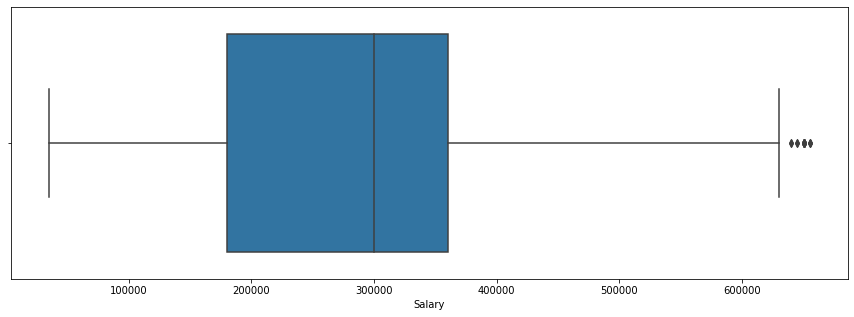

In [139]:
plt.figure(figsize=(15,5))
sns.boxplot(df1['Salary'])
plt.show()

In [140]:
# Note :
# After divifing salary into 3 parts less than 200000 , between 200000 & 400000 , greater than 400000 we find most of the students
# was passed from state board so we are putting state board in all missing 12board values

In [141]:

df1['12board'].replace(to_replace = 0, value = 'cbse', inplace = True)

In [142]:
print(df1['12board'].value_counts())

cbse                                                               1702
state board                                                        1237
icse                                                                127
up board                                                             82
isc                                                                  39
                                                                   ... 
punjab state board of technical education & industrial training       0
maharashtra state board mumbai divisional board                       0
gujarat board                                                         0
hslc (tamil nadu state board)                                         0
0                                                                     0
Name: 12board, Length: 340, dtype: int64


In [143]:
state_board_list=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','andhra pradesh state board',
       'up bord', 'gujarat board', 'intermideate','west bengal state council of technical education'
       'ghseb']

In [144]:
# dividing 12board column in 4 groups : 'state','cbse','icse' and 'n/a'
for i in state_board_list:
    df1['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    df1['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    df1['12board'].replace(i,'icse',inplace=True)

df1['12board'].replace(0,'n/a',inplace=True)

df1['12board'].unique()

array(['state', 'cbse', 'icse'], dtype=object)

state    2005
cbse     1705
icse      170
Name: 12board, dtype: int64



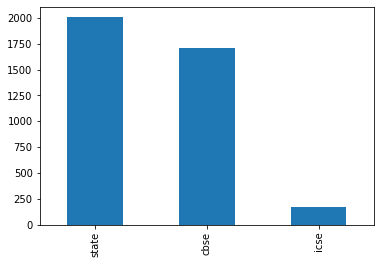

In [145]:
print(df1['12board'].value_counts())
print()
(df1['12board'].value_counts().plot(kind='bar'))
plt.show()

In [324]:
df1['10board'].value_counts()

cbse                          1353
state board                   1150
0                              333
icse                           268
ssc                            118
                              ... 
sslc,karnataka                   0
gsheb                            0
gujarat board                    0
andhra pradesh state board       0
up board allahabad               0
Name: 10board, Length: 275, dtype: int64

In [325]:

# replacing 0 with state baord as it is most frequent in 10board after dividing salary in 3 parts as menctioned above
df1['10board'].replace(to_replace = 0, value = 'state board', inplace = True)

In [326]:
df1['10board'].value_counts()

state board                                        1483
cbse                                               1353
icse                                                268
ssc                                                 118
up board                                             80
                                                   ... 
maharashtra state board mumbai divisional board       0
sslc,karnataka                                        0
gsheb                                                 0
gujarat board                                         0
0                                                     0
Name: 10board, Length: 275, dtype: int64

In [327]:
state_board_list=['board ofsecondary education,ap', 'state board',
       'mp board bhopal','cbsc' ,
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
        'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'matric board',
       'board of secondary education',
       'west bengal board of secondary education',
       'jharkhand secondary examination board,ranchi', 'u p board',
       'bseb,patna', 'hsc', 'bse', 'sss pune',
       'karnataka education board (keeb)', 'kerala',
       'state board of secondary education( ssc)', 'gsheb',
       'up(allahabad)', 'nagpur', 'don bosco maatriculation school',
       'karnataka state secondary education board', 'maharashtra',
       'karnataka secondary education board',
       'himachal pradesh board of school education',
       'certificate of middle years program of ib',
       'karnataka board of secondary education',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'board of secendary education orissa',
       'karantaka secondary education and examination borad', 'hbsc',
       'kseeb(karnataka secondary education examination board)',
       'hbse', 'state(karnataka board)',
       'jharkhand accademic council',
       'jharkhand secondary examination board (ranchi)',
       'karnataka secondary education examination board', 'delhi board',
       'mirza ahmed ali baig', 'jseb', 'bse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'upbhsie', 'secondary board of rajasthan',
       'tamilnadu matriculation board', 'jharkhand secondary board',
       'board of secondary education,andhara pradesh', 'up baord',
       'state', 'board of intermediate education',
       'state board of secondary education,andhra pradesh',
       'up board , allahabad',
       'stjosephs girls higher sec school,dindigul', 'maharashtra board',
       'education board of kerala', 'board of ssc',
       'maharashtra state board pune',
       'board of school education harayana',
       'secondary school cerfificate', 'maharashtra sate board', 'ksseb',
       'bihar examination board, patna', 'latur',
       'board of secondary education, rajasthan', 'state borad hp',
       'cluny', 'bsepatna', 'up borad', 'ssc board of andrapradesh',
       'matric', 'bse,orissa', 'ssc-andhra pradesh', 'mp',
       'karnataka education board', 'mhsbse',
       'karnataka sslc board bangalore', 'karnataka', 'u p',
       'secondary school of education', 'state board of karnataka',
       'karnataka secondary board', 'andhra pradesh board ssc',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'hse,orissa', 'national public school', 'nagpur board',
       'jharkhand academic council', 'bsemp',
       'board of secondary education, andhra pradesh',
       'board of secondary education orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of secondary education,ap',
       'board of secondary education,andhra pradesh',
       'jawahar navodaya vidyalaya', 'aisse',
       'karnataka board of higher education', 'bihar',
       'kerala state board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'bharathi matriculation school', 'uttaranchal state board',
       'wbbsce', 'mp state board', 'seba(assam)', 'anglo indian', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'msbshse,pune', 'tamilnadu state board', 'kerala university',
       'uttaranchal shiksha avam pariksha parishad',
       'bse(board of secondary education)',
       'bright way college, (up board)',
       'school secondary education, andhra pradesh',
       'secondary state certificate',
       'maharashtra state board of secondary and higher secondary education,pune',
       'andhra pradesh state board', 'stmary higher secondary', 'cgbse',
       'secondary school certificate', 'rajasthan board ajmer', 'mpbse',
       'pune board','board of secondary education,orissa',
       'maharashtra state board,pune', 'up bord',
       'kiran english medium high school', 'state board (jac, ranchi)',
       'gujarat board', 'state board ', 'sarada high scchool',
       'kalaimagal matriculation higher secondary school',
       'karnataka board', 'maharastra board', 'sslc board',
       'ssc maharashtra board', 'tamil nadu state', 'uttrakhand board',
       'bihar secondary education board,patna',
       'haryana board of school education',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ksseb(karnataka state board)', 'nashik board',
       'jharkhand secondary education board', 'himachal pradesh board',
       'maharashtra satate board',
       'maharashtra state board mumbai divisional board',
       'dav public school,hehal',
       'state board of secondary education, ap',
       'rajasthan board of secondary education', 'hsce',
       'karnataka secondary education',
       'board of secondary education,odisha', 'maharashtra nasik board',
       'west bengal board of secondary examination (wbbse)',
       'holy cross matriculation hr sec school',  'apssc',
       'bseb patna', 'kolhapur', 'bseb, patna', 'up board allahabad',
       'biharboard', 'nagpur board,nagpur', 'pune', 'gyan bharati school',
       'rbse,ajmer', 'board of secondaray education',
       'secondary school education', 'state bord', 'jbse,jharkhand',
       'hse', 'madhya pradesh board', 'bihar school examination board',
       'west bengal board of secondary eucation', 'state boardmp board ',
       'board of secondary education (bse) orissa',
       'maharashtra state board for ssc',
       'board of secondary school education', 'latur board',
       "stmary's convent inter college", 'nagpur divisional board',
       'ap state board', 'cgbse raipur', 'uttranchal board', 'ksbe',
       'bihar school examination board patna',
       'sslc,karnataka', 'mp-bse', 'up bourd', 'dav public school sec 14',
       'board of school education haryana',
       'council for indian school certificate examination',
       'aurangabad board', 'j&k state board of school education',
       'maharashtra state board of secondary and higher secondary education',
       'maharashtra state boar of secondary and higher secondary education',
       'ssc regular', 'karnataka state examination board', 'nasik',
       'west bengal  board of secondary education', 'up board,allahabad',
       'bseb ,patna',
       'state board - west bengal board of secondary education : wbbse',
       'maharashtra state board of secondary & higher secondary education',
       'delhi public school', 'karnataka secondary eduction',
       'secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)', 'apsche',
       'board of  secondary education',
       'board of high school and intermediate education uttarpradesh',
       'kea', 'board of secondary education - andhra pradesh',
       'ap state board for secondary education', 'seba',
       'punjab school education board, mohali',
       'jharkhand acedemic council', 'hse,board',
       'board of ssc education andhra pradesh', 'up-board', 'bse,odisha']

In [328]:
for i in state_board_list:
    df1['10board'].replace(i,'state',inplace=True)

cbse_board_list =['cbse', 'central board of secondary education','cbese','cbse board','cbse[gulf zone]','cbse ',
                  'central board of secondary education, new delhi']

for i in cbse_board_list:
    df1['10board'].replace(i,'cbse',inplace=True)

icse_board_list=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi','icse board , new delhi','icse board']
for i in icse_board_list:
    df1['10board'].replace(i,'icse',inplace=True)

df1['10board'].replace(0,'n/a',inplace=True)

print(df1['10board'].value_counts())

state    2238
cbse     1371
icse      271
Name: 10board, dtype: int64


state    2238
cbse     1371
icse      271
Name: 10board, dtype: int64



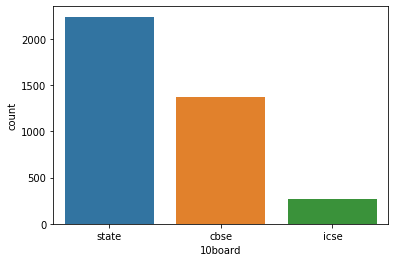

In [329]:
print(df1['10board'].value_counts())
print()
sns.countplot(df1['10board'])
plt.show()

B.Tech/B.E.      3596
MCA               234
M.Tech./M.E.       48
M.Sc. (Tech.)       2
Name: Degree, dtype: int64


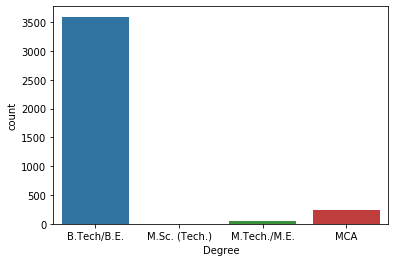

In [330]:
print(df1['Degree'].value_counts())
sns.countplot(df1['Degree'])
plt.show()

In [331]:
#As records of students having MCA,Mtech,Msc degree are less so we can combine them under one category as 'PG'

In [332]:
Degree =\
{
'B.Tech/B.E.' : 'UG',
    'MCA' : 'PG',
    'M.Tech./M.E.' : 'PG',
    'M.Sc. (Tech.)' : 'PG'
}

In [333]:
df1['Degree'] = df1.Degree.map(Degree)

In [334]:
df1.Degree.value_counts()

UG    3596
PG     284
Name: Degree, dtype: int64

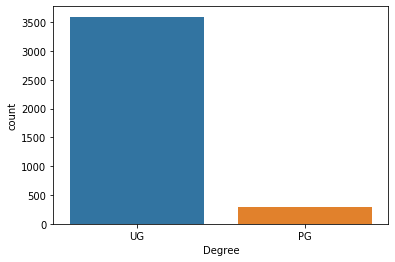

In [335]:
sns.countplot(df1['Degree'])
plt.show()

In [336]:
# To Reduce dimensions we are converting sates into 6 zones
df1['CollegeState'].unique()

[Andhra Pradesh, Madhya Pradesh, Uttar Pradesh, Karnataka, Tamil Nadu, ..., Bihar, Assam, Sikkim, Union Territory, Meghalaya]
Length: 25
Categories (25, object): [Andhra Pradesh, Madhya Pradesh, Uttar Pradesh, Karnataka, ..., Assam, Sikkim, Union Territory, Meghalaya]

In [337]:
CollegeState_zone =\
{
'Himachal Pradesh': 'North_Zone.',
    'Punjab': 'North_Zone.',
    'Uttarakhand': 'North_Zone.',
    'Uttar Pradesh' : 'North_Zone.',
    'Haryana' : 'North_Zone.',
    
    'Andhra Pradesh' : 'South_Zone.',
    'Karnataka' : 'South_Zone.',
    'Kerala' : 'South_Zone.',
    'Tamil Nadu' : 'South_Zone.',
    'Telangana' : 'South_Zone.',
    
    'Bihar' : 'Other_Zone',
    'Orissa' : 'Other_Zone',
    'Jharkhand' : 'Other_Zone',
    'West Bengal' : 'Other_Zone',
    'Rajasthan'  : 'Other_Zone',
    'Gujarat' : 'Other_Zone',
    'Goa' : 'Other_Zone',
    'Maharashtra' : 'Other_Zone',
    'Madhya Pradesh' : 'Other_Zone', 
    'Chhattisgarh' : 'Other_Zone',
    'Assam' : 'Other_Zone',
    'Sikkim' : 'Other_Zone',
    'Nagaland' : 'Other_Zone',
    'Meghalaya' : 'Other_Zone',
    'Manipur' : 'Other_Zone',
    'Mizoram' : 'Other_Zone',
    'Tripura' : 'Other_Zone',
    'Arunachal Pradesh' : 'Other_Zone',
    'Union Territory' : 'Other_Zone',
    'Jammu and Kashmir' : 'Other_Zone',
    'Delhi' : 'Other_Zone'
    
}

['South_Zone.' 'Other_Zone' 'North_Zone.']

North_Zone.    1369
South_Zone.    1288
Other_Zone     1223
Name: CollegeState, dtype: int64



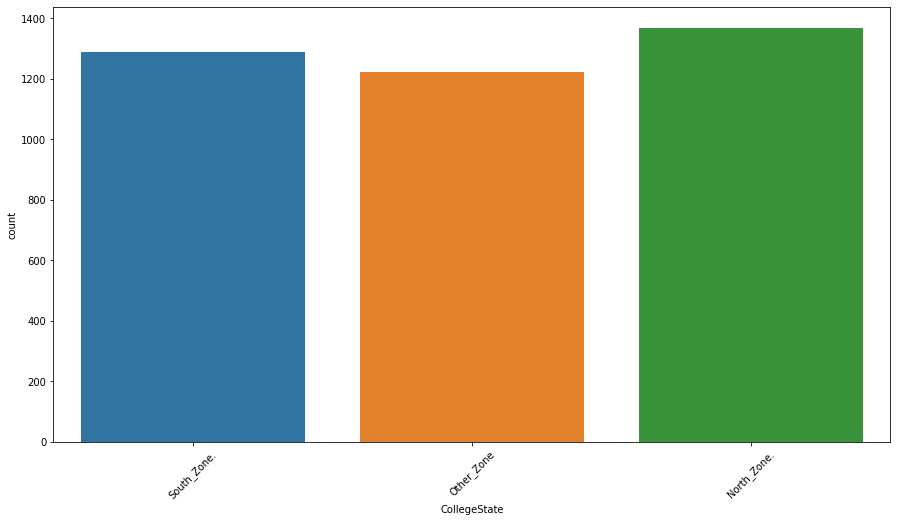

In [338]:
df1['CollegeState'] = df1['CollegeState'].map(CollegeState_zone)

print(df1['CollegeState'].unique())
print()
print(df1['CollegeState'].value_counts())

print()
plt.figure(figsize = (15, 8))
plt.xticks(rotation = 45)
sns.countplot(df1['CollegeState'])
plt.show()

In [339]:
df1.isnull().sum()

Salary                   0
Gender                   0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
English                  0
Logical                  0
Quant                    0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
DOByear                  0
GradAge                  0
dtype: int64

mean markes scored  71.62976546391751
median markes scored 71.7

Skewness: 0.156810047144647
Kurtosis: 0.05507354423173849



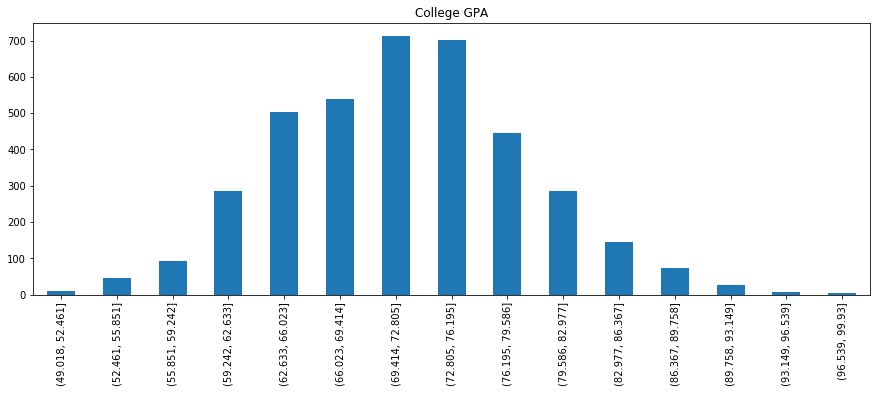

In [340]:
# Distribution of College grades

print('mean markes scored ',df1['collegeGPA'].mean())
print('median markes scored',df1['collegeGPA'].median())

print()

print('Skewness:',skew(df1['collegeGPA']))
print('Kurtosis:',kurtosis(df1['collegeGPA']))

print()

plt.figure(figsize=(15,5))
df1['collegeGPA'].value_counts(bins=15,sort=False).plot(kind='bar',title='College GPA')
plt.show()

In [341]:
df1['collegeGPA']=pd.cut(df1.collegeGPA,bins=[33,60,75,100],labels=[0,1,2])

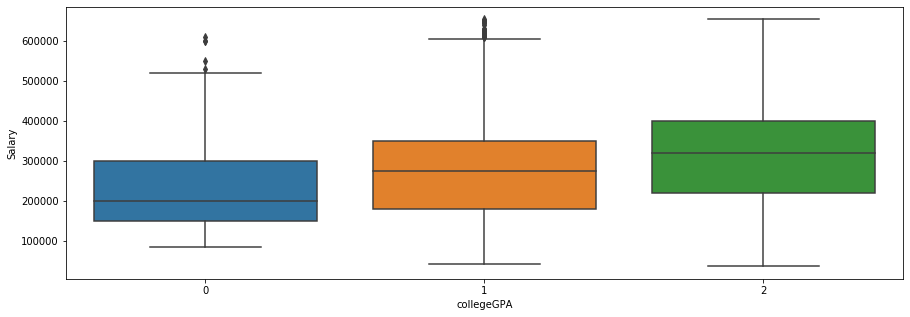

In [342]:
plt.figure(figsize=(15,5))
sns.boxplot(df1['collegeGPA'],df1['Salary'])
plt.show()

mean markes scored  74.42677577319571
median markes scored 74.315

Skewness: -0.02699677272384228
Kurtosis: -0.626711749292816



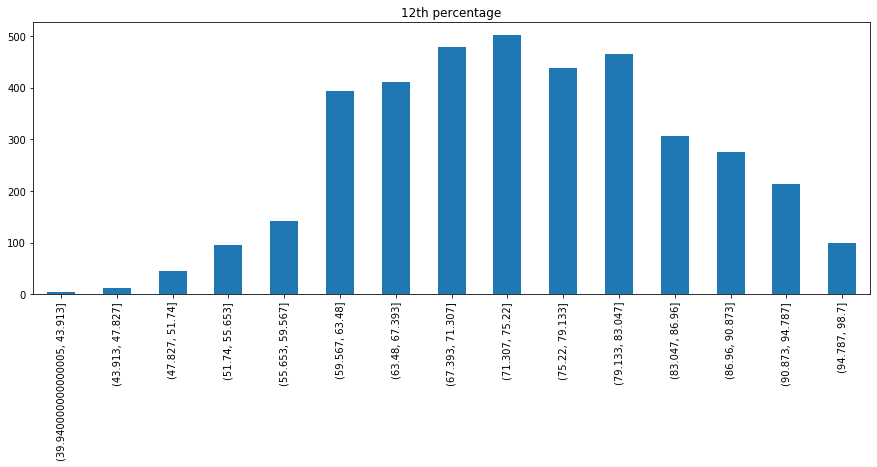

In [343]:
# Distribution of 12th percentage

print('mean markes scored ',df1['12percentage'].mean())
print('median markes scored',df1['12percentage'].median())

print()

print('Skewness:',skew(df1['12percentage']))
print('Kurtosis:',kurtosis(df1['12percentage']))

print()

plt.figure(figsize=(15,5))
df1['12percentage'].value_counts(bins=15,sort=False).plot(kind='bar',title='12th percentage')
plt.show()

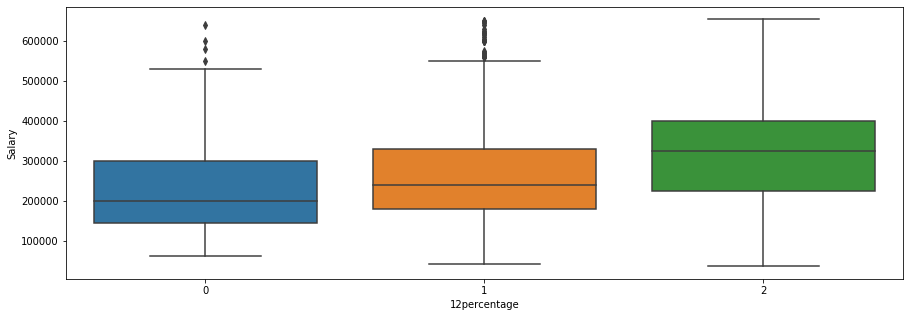

In [344]:
df1['12percentage']=pd.cut(df1['12percentage'],bins=[33,60,75,100],labels=[0,1,2])


plt.figure(figsize=(15,5))
sns.boxplot(df1['12percentage'],df1['Salary'])
plt.show()

mean markes scored  77.87593814432984
median markes scored 79.0

Skewness: -0.5905259022784912
Kurtosis: -0.09691734921658268



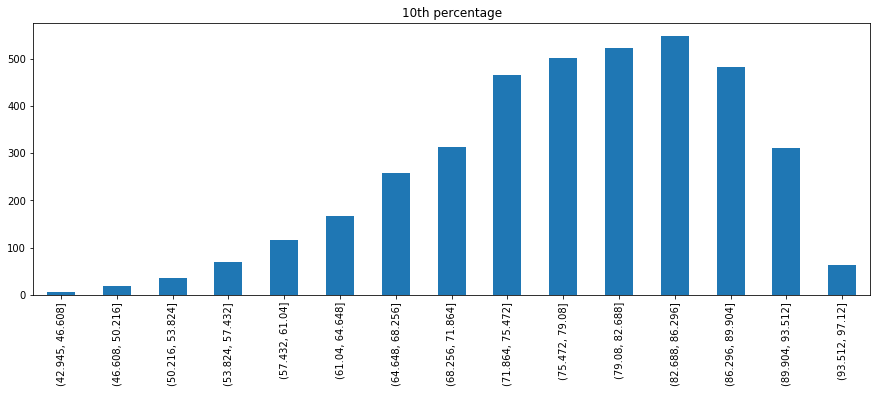

In [345]:
# Distribution of 10th percentage

print('mean markes scored ',df1['10percentage'].mean())
print('median markes scored',df1['10percentage'].median())
print()
print('Skewness:',skew(df1['10percentage']))
print('Kurtosis:',kurtosis(df1['10percentage']))
print()

plt.figure(figsize=(15,5))
df1['10percentage'].value_counts(bins=15,sort=False).plot(kind='bar',title='10th percentage')
plt.show()

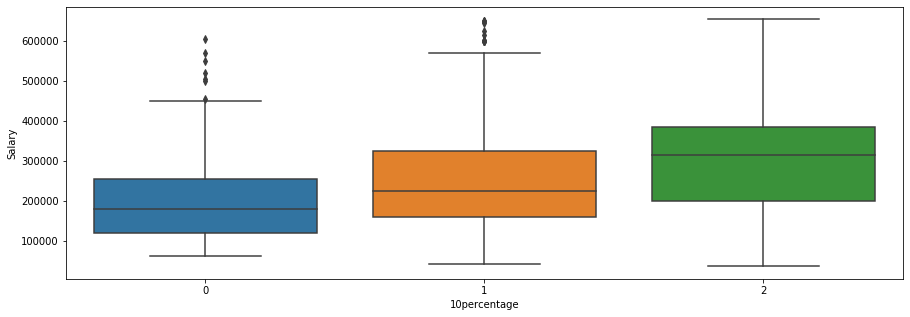

In [346]:
df1['10percentage']=pd.cut(df1['10percentage'],bins=[33,60,75,100],labels=[0,1,2])


plt.figure(figsize=(15,5))
sns.boxplot(df1['10percentage'],df1['Salary'])
plt.show()

In [347]:
df1

,Salary,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,DOByear,GradAge
0,420000,f,2,state,2007,2,state,2,UG,CS,...,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,1990,21
1,500000,m,2,cbse,2007,2,cbse,2,UG,EC,...,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,1989,23
2,325000,f,2,cbse,2010,1,cbse,2,UG,CS,...,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,1992,22
4,200000,m,2,cbse,2008,2,cbse,2,UG,EC,...,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1991,21
5,300000,m,2,state,2010,2,state,2,UG,EC,...,0,0,0,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,1992,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,m,0,cbse,2006,0,cbse,2,UG,CS,...,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194,1987,23
3994,100000,f,2,state,2009,2,state,2,UG,EC,...,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943,1992,21
3995,320000,m,2,state,2008,1,state,2,UG,CS,...,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,1991,21
3996,200000,f,2,state,2010,1,state,2,UG,CS,...,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,1992,22


# Data Visualization

### Univariate Analysis

### 1. Gender Ratio Distribution

Number of males: 2943
Number of females: 937
Male to Female Gender Ratio: 3.14



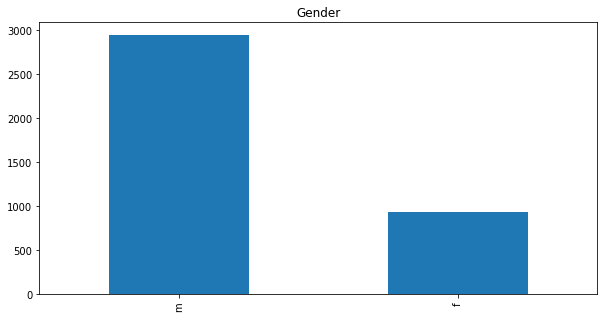

In [348]:
males = df1['Gender'].where(df1['Gender'] == 'm').count()
females = df1['Gender'].where(df1['Gender'] == 'f').count()
print("Number of males: {}".format(males))
print("Number of females: {}".format(females))
print("Male to Female Gender Ratio: {:.2f}".format(males / females))
print()
df1['Gender'].value_counts().plot(kind = 'bar', title = 'Gender', figsize = (10, 5))
plt.show()

In [349]:
#More male candidates than female candidates.

### 2.Academic scores distribution

#### 10th percentage 

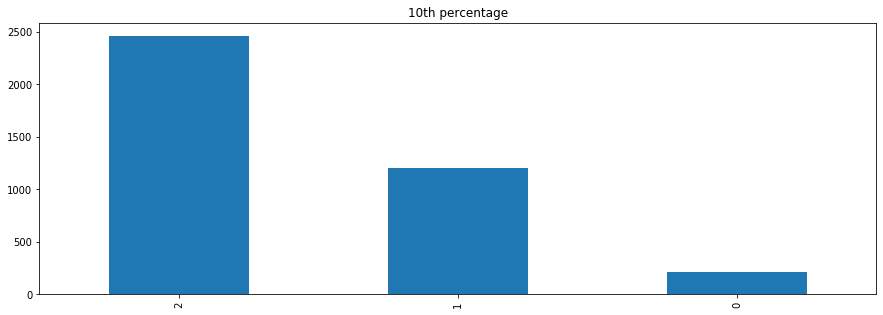

In [350]:
# Distribution of 10th percentage

plt.figure(figsize=(15,5))
df1['10percentage'].value_counts().plot(kind='bar',title='10th percentage')
plt.show()

In [351]:
# Observation:
# 1. Data is left skewed as some candidates didn't perform well in 10th standerd which impacts average score of all canditates 
#    i.e reduces the average scores as seen above mean= 77.92% & Median= 79.15%
# 2. Most of the students score around 79% marks

#### 12th percentage 

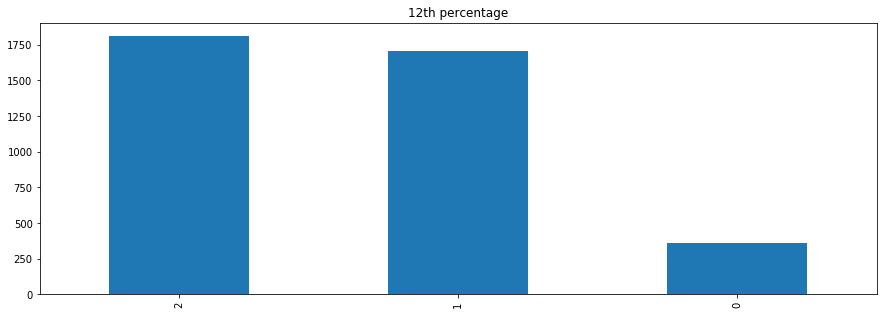

In [352]:
# Distribution of 12th percentage

plt.figure(figsize=(15,5))
df1['12percentage'].value_counts().plot(kind='bar',title='12th percentage')
plt.show()

In [353]:
# Observations:
# 1. 12 class scores are normally distributed as most of the student scores around 74.4 %.
# 2. Hence 12 class scores are less than 10 class scores.

#### College GPA 

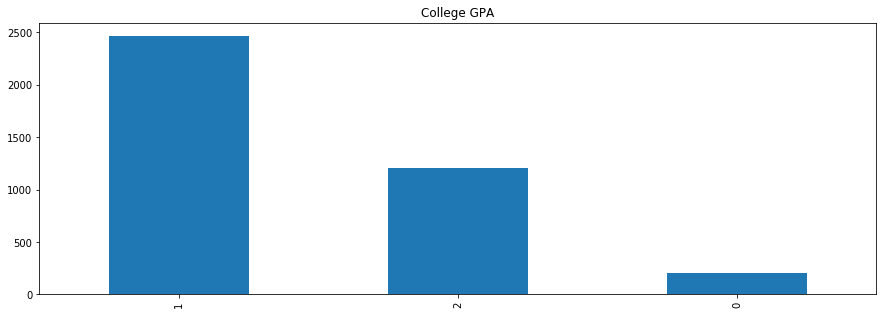

In [354]:
# Distribution of College grades

plt.figure(figsize=(15,5))
df1['collegeGPA'].value_counts().plot(kind='bar',title='College GPA')
plt.show()

In [355]:
# Observation:
# 1. Distribution of college GPA is approximately normal and most of students scored 71.7% in college 

### 3. College Tier distribution

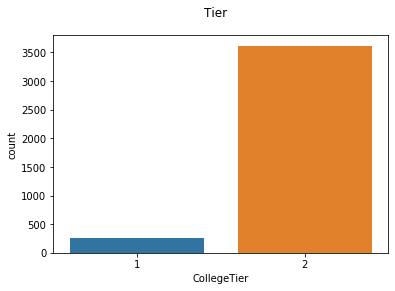

In [356]:
# Distribution of College Tier

sns.countplot(df1['CollegeTier'])
plt.suptitle('Tier')
plt.show()

In [357]:
df1['CollegeTier'].value_counts()

2    3617
1     263
Name: CollegeTier, dtype: int64

In [358]:
# Observation:
# Students from college Tier 2 are higher in number


### 4. Degree distribution 

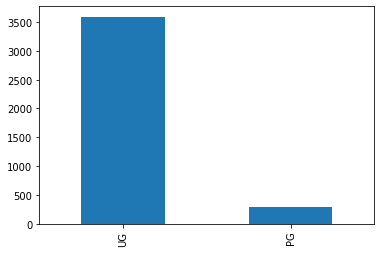

In [359]:
df1['Degree'].value_counts().plot(kind='bar')

In [360]:
# Observations:
# UG students are greater than students having PG degree.

### 5. Specialization distribution 

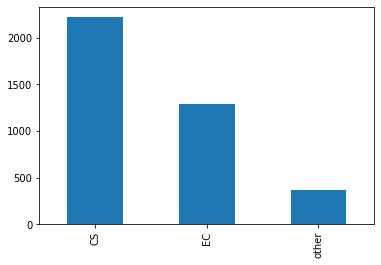

In [361]:

df1['Specialization'].value_counts().plot(kind='bar')
plt.show()

In [362]:



# Observations:
# Students having specialization in computer science are higher in number.


### 6. 10 board distribution

state    2238
cbse     1371
icse      271
Name: 10board, dtype: int64



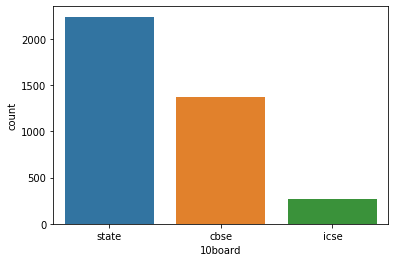

In [363]:
print(df1['10board'].value_counts())

print()

sns.countplot(df1['10board'])
plt.show()

In [364]:
#Observations:
# Most of the class10 students are from state board

### 7. 12board distribution 

state    2347
cbse     1363
icse      170
Name: 12board, dtype: int64



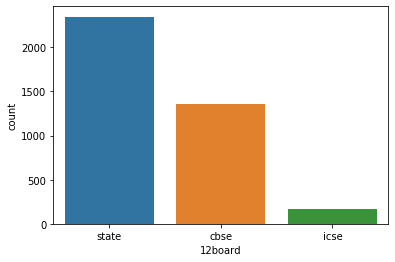

In [365]:
print(df1['12board'].value_counts())

print()

sns.countplot(df1['12board'])
plt.show()

In [366]:
#Observations:
# Most of the class12 students are from state board

### Distribution of Salary

mean markes scored  285596.3917525773
median markes scored 300000.0

Skewness: 0.4317924702785246
Kurtosis: -0.2642819637495535



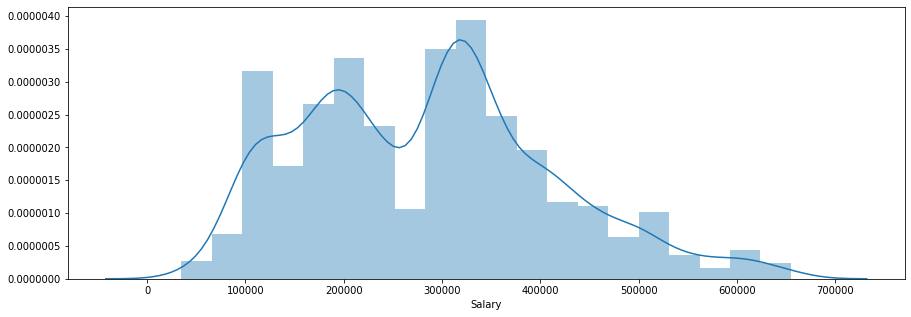

In [367]:
print('mean markes scored ',df1['Salary'].mean())
print('median markes scored',df1['Salary'].median())

print()

print('Skewness:',skew(df1['Salary']))
print('Kurtosis:',kurtosis(df1['Salary']))

print()

plt.figure(figsize=(15,5))
sns.distplot(df1['Salary'],bins=20, kde=True,hist=True)
plt.show()

In [368]:
# Observation:
# Salary of employees is not normally distributed i.e there is a right skewness in salary as some employees was recurited
# at higher package and the kurtosis is very high as mostly employees got there starting package of Rs 300000

In [369]:
Q1=df1['Salary'].quantile(0.25)
Q2=df1['Salary'].quantile(0.5)
Q3=df1['Salary'].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
df1=df1[df1['Salary']<UL]

mean markes scored  283263.03501945524
median markes scored 300000.0

Skewness: 0.36278547814406603
Kurtosis: -0.41550688570609395



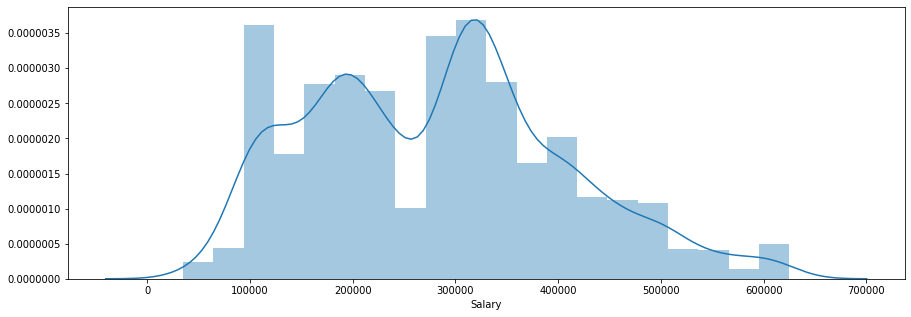

In [370]:
print('mean markes scored ',df1['Salary'].mean())
print('median markes scored',df1['Salary'].median())

print()

print('Skewness:',skew(df1['Salary']))
print('Kurtosis:',kurtosis(df1['Salary']))

print()

plt.figure(figsize=(15,5))
sns.distplot(df1['Salary'],bins=20, kde=True,hist=True)
plt.show()

## Bivariate analysis 

# Features Comparison with target(Salary)

### 1. Salary vs Gender

Gender
f    277210.920771
m    285198.219788
Name: Salary, dtype: float64
Gender
f    300000
m    300000
Name: Salary, dtype: int64



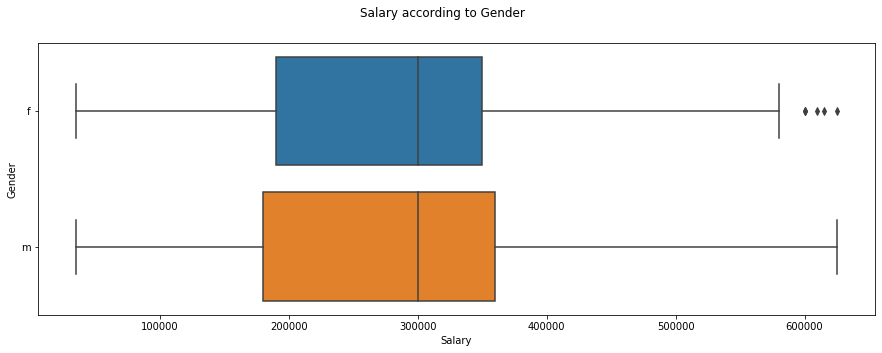

In [371]:
# Does gender affect salaries ?

print(df1.groupby('Gender')['Salary'].mean())
print(df1.groupby('Gender')['Salary'].median())

print()
plt.figure(figsize=(15,5))
sns.boxplot(x='Salary', y = 'Gender', data=df1)
plt.suptitle('Salary according to Gender')
plt.show()

In [372]:
# Observations:

# 1 Mean salary of males is slightly greater than females salary.
# 2 Median salary earned by both the genders are equal

### 2. Salary vs college state 

CollegeState
North_Zone.    274066.127847
Other_Zone     286992.574257
South_Zone.    289500.780031
Name: Salary, dtype: float64



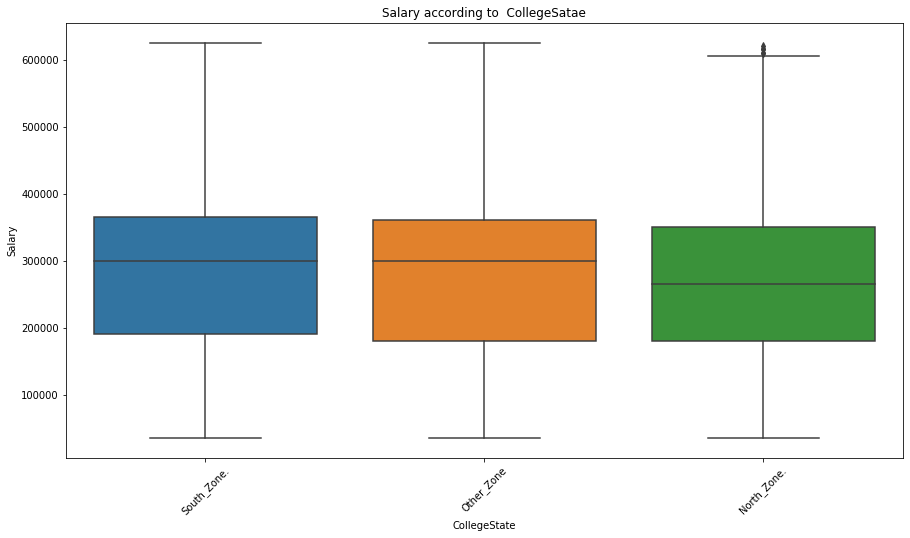

In [373]:
# Does loaction of college affect salaries of Candidates?

print(df1.groupby('CollegeState')['Salary'].mean())
print()

plt.figure(figsize = (15, 8))
plt.xticks(rotation = 45)
sns.boxplot(x = 'CollegeState', y = 'Salary', data = df1)
plt.title('Salary according to  CollegeSatae')
plt.show()

In [374]:
'''Jammu and Kashmir, Himachal Pradesh, Punjab, Uttarakhand , Uttar Pradesh and Haryana.
East Zone: the east zone is comprised of states of Bihar, Orissa, Jharkhand, and West Bengal.
West Zone: This zone has the states of Rajasthan , Gujarat, Goa and Maharashtra
South Zone: States of Andhra Pradesh, Karnataka, Kerala and Tamil Nadu
Central Zone: Madhya Pradesh and Chhattisgarh
North East Zone - Assam, Sikkim, Nagaland, Meghalaya, Manipur, Mizoram, Tripura and Arunachal Pradesh'''

'Jammu and Kashmir, Himachal Pradesh, Punjab, Uttarakhand , Uttar Pradesh and Haryana.\nEast Zone: the east zone is comprised of states of Bihar, Orissa, Jharkhand, and West Bengal.\nWest Zone: This zone has the states of Rajasthan , Gujarat, Goa and Maharashtra\nSouth Zone: States of Andhra Pradesh, Karnataka, Kerala and Tamil Nadu\nCentral Zone: Madhya Pradesh and Chhattisgarh\nNorth East Zone - Assam, Sikkim, Nagaland, Meghalaya, Manipur, Mizoram, Tripura and Arunachal Pradesh'

In [375]:
# Observations:
# There is huge affect of college loaction on salaries of Candidates as it clearly visible above some college candidates 
# hired at good package and some are getting very low package
#Median salary of students from Meghalaya and Jammu&Kashmir is higher.

### 3. Salary vs Degree

Degree
PG    249537.366548
UG    285914.661444
Name: Salary, dtype: float64



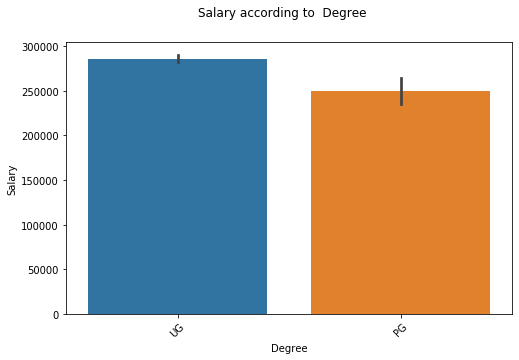

In [376]:
# Does degree awarded affect salaries of Candidates?

print(df1.groupby('Degree')['Salary'].mean())

print()

plt.figure(figsize = (8, 5))
plt.xticks(rotation = 45)
sns.barplot(x = 'Degree', y = 'Salary', data = df1)
plt.suptitle('Salary according to  Degree')
plt.show()

In [377]:
# Observation:
# There is not much difference in median salary earned by different degree holders but it's clearly visible that UG degree Candidates 
# are getting huge packages as compare to other PG degree candidates.

### 4. Salary vs Specialization 

Specialization
CS       286346.328196
EC       280089.633671
other    275803.278689
Name: Salary, dtype: float64



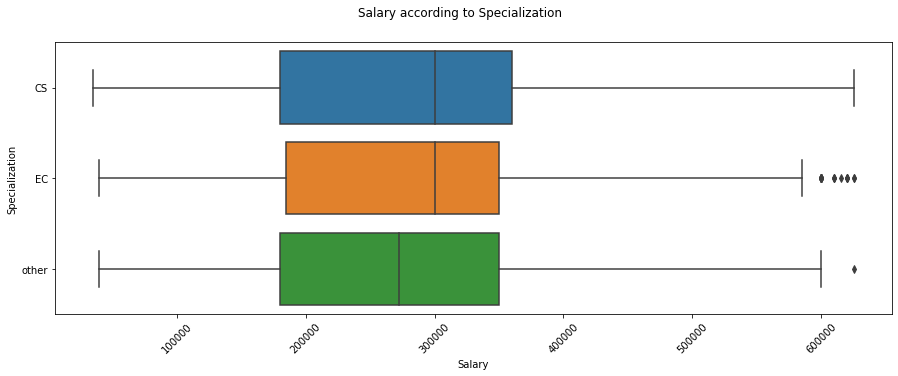

In [378]:
# Does specialization affect salary ?

print(df1.groupby('Specialization')['Salary'].mean())

print()

plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
sns.boxplot(x='Salary', y = 'Specialization', data=df1)
plt.suptitle('Salary according to Specialization')
plt.show()

In [379]:
# Observation:
# The mean salary of other depts is higher than salary of candidates having specialization in CS and EC.

### 5. Salary vs CollegeTier 

CollegeTier
1    362887.596899
2    277551.848763
Name: Salary, dtype: float64



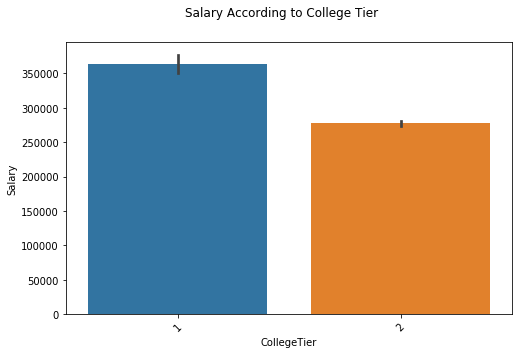

In [380]:
print(df1.groupby('CollegeTier')['Salary'].mean())

print()

plt.figure(figsize=(8,5))
plt.xticks(rotation = 45)
sns.barplot(x = 'CollegeTier',y='Salary',data=df1)
plt.suptitle('Salary According to College Tier')
plt.show()

In [381]:
#Observations:
#Salary of students from Tier1 college is high.

### 6. Salary vs 10 board

10board
cbse     293533.724340
icse     303531.598513
state    274504.500450
Name: Salary, dtype: float64



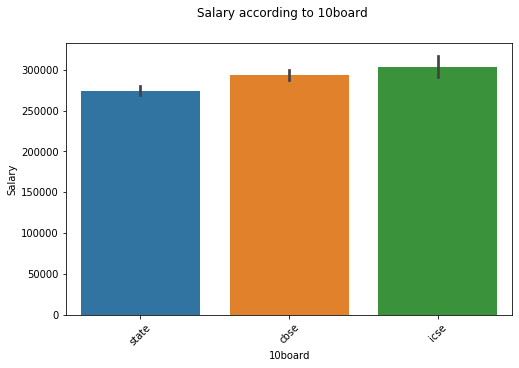

In [382]:
print(df1.groupby('10board')['Salary'].mean())

print()

plt.figure(figsize=(8,5))
plt.xticks(rotation = 45)
sns.barplot(x = '10board',y='Salary',data=df1)
plt.suptitle('Salary according to 10board')
plt.show()

In [383]:
#Observations:
#Salary of 10board students having board other than state,cbse,icse boards is higher.



### 7. Salary vs 12 board

12board
cbse     294612.546125
icse     314053.254438
state    274433.290433
Name: Salary, dtype: float64



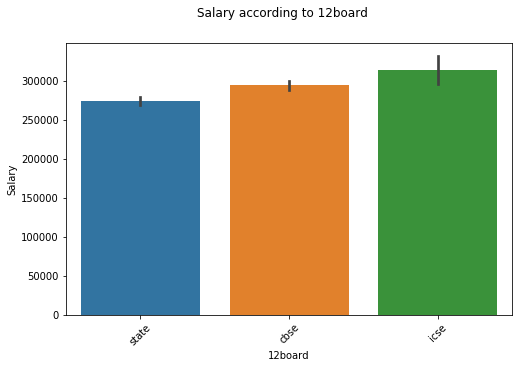

In [384]:
print(df1.groupby('12board')['Salary'].mean())

print()

plt.figure(figsize=(8,5))
plt.xticks(rotation = 45)
sns.barplot(x = '12board',y='Salary',data=df1)
plt.suptitle('Salary according to 12board')
plt.show()

In [385]:
#Observations:
#Salary of 12board students having board other than state,cbse,icse boards is higher.



### 7. Salary vs gradage 

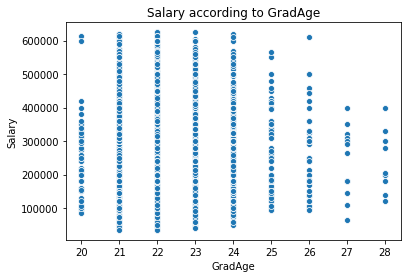

In [386]:

sns.scatterplot(df1['GradAge'],df1['Salary'])
plt.title('Salary according to GradAge')
plt.show()

In [387]:
# Observations:
# High salary is of students having age 23.

# Salary vs 10th Percentage

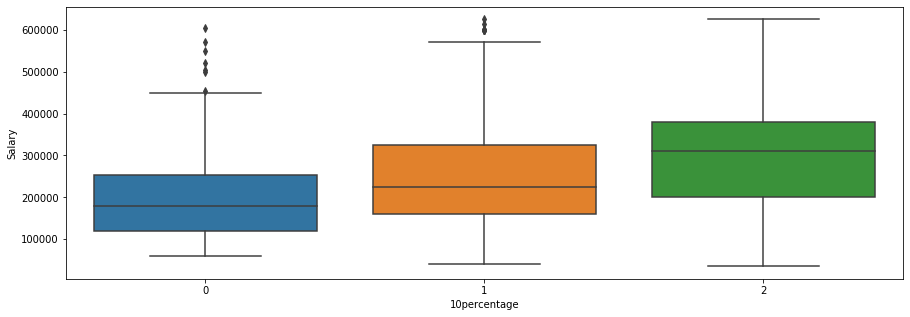

In [388]:



plt.figure(figsize=(15,5))
sns.boxplot(df1['10percentage'],df1['Salary'])
plt.show()

# Salary Vs 12th percentage

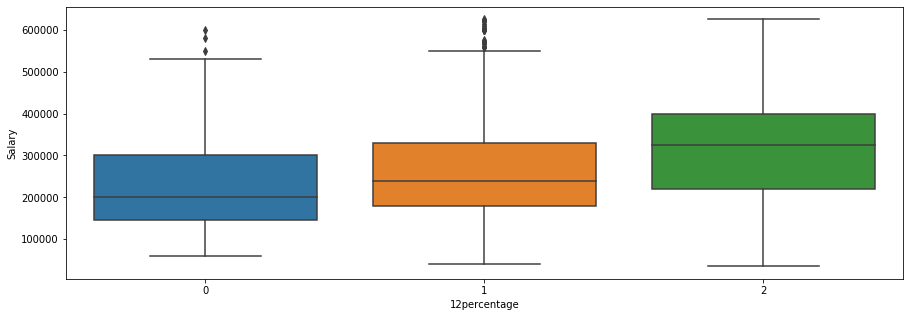

In [389]:
plt.figure(figsize=(15,5))
sns.boxplot(df1['12percentage'],df1['Salary'])
plt.show()

# Salary Vs CollegeGPA

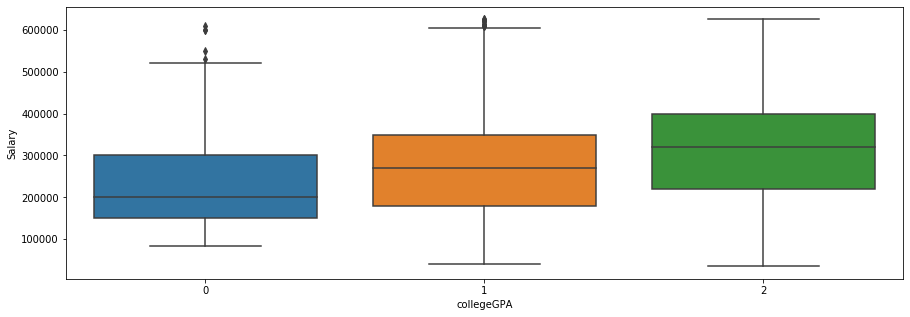

In [390]:
plt.figure(figsize=(15,5))
sns.boxplot(df1['collegeGPA'],df1['Salary'])
plt.show()

# Correlation

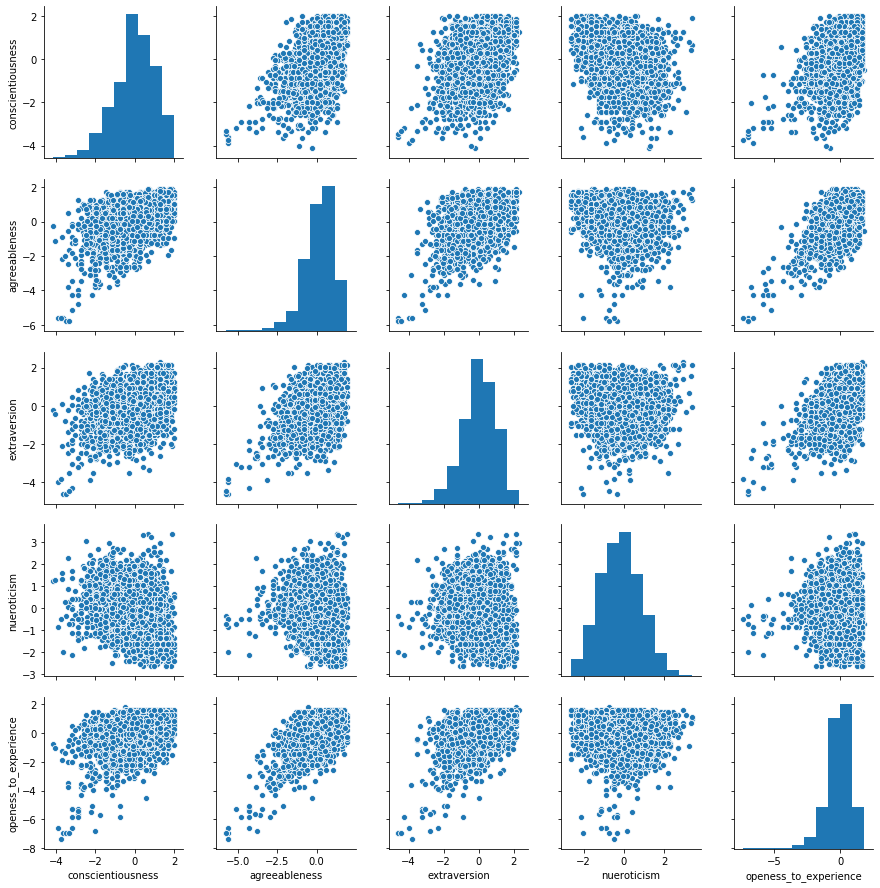

In [391]:
personality_scores=['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


sns.pairplot(df1, vars = personality_scores)
plt.show()

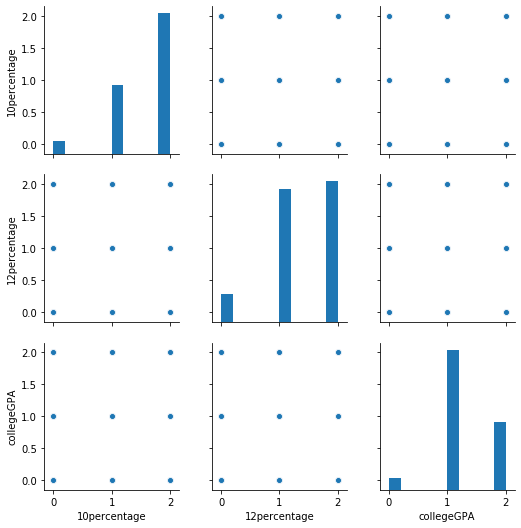

In [392]:
#Correlation of Academic scores

academic_performance = ['10percentage', '12percentage', 'collegeGPA']

sns.pairplot(df1, vars = academic_performance)
plt.show()

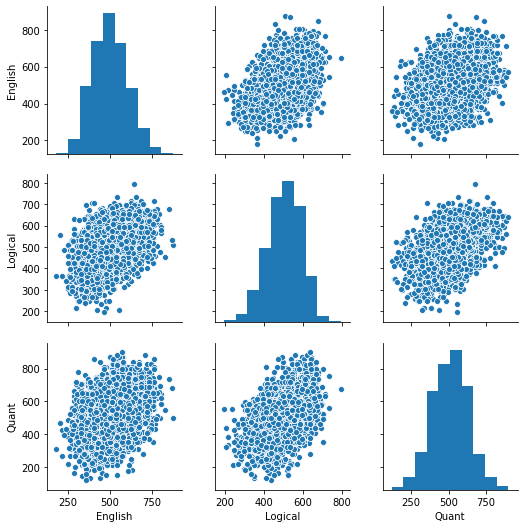

In [393]:
# Correlation of Standard Test Scores

std_test_scores = ['English', 'Logical', 'Quant']
sns.pairplot(df1, vars = std_test_scores)
plt.show()

In [394]:
# correlation b/w salary and all numerical feature

df1.drop(['Gender', 'CollegeTier', 'Degree', 'Specialization', 'CollegeState'],axis=1).corr()['Salary']

Salary                   1.000000
12graduation            -0.137419
English                  0.255925
Logical                  0.253841
Quant                    0.349692
ComputerProgramming      0.161547
ElectronicsAndSemicon    0.019502
ComputerScience         -0.129654
MechanicalEngg           0.005751
ElectricalEngg          -0.046689
TelecomEngg             -0.006061
CivilEngg                0.024719
conscientiousness       -0.052567
agreeableness            0.062777
extraversion            -0.030309
nueroticism             -0.058978
openess_to_experience   -0.013143
DOByear                 -0.130327
GradAge                 -0.061902
Name: Salary, dtype: float64

In [395]:
# Observation:
# None of the numerical feature is much correlated with Salary.

In [396]:
### Trying to find correlation with target variable by combining different features

# Creating new columns by taking average of std_test_scores and academic_performance
df1['Average_Score']=(df1['Logical']+df1['Quant']+df1['English'])/3

print(df1.drop(['Gender', 'CollegeTier', 'Degree', 'Specialization', 'CollegeState'],axis=1).corr()['Salary'])

Salary                   1.000000
12graduation            -0.137419
English                  0.255925
Logical                  0.253841
Quant                    0.349692
ComputerProgramming      0.161547
ElectronicsAndSemicon    0.019502
ComputerScience         -0.129654
MechanicalEngg           0.005751
ElectricalEngg          -0.046689
TelecomEngg             -0.006061
CivilEngg                0.024719
conscientiousness       -0.052567
agreeableness            0.062777
extraversion            -0.030309
nueroticism             -0.058978
openess_to_experience   -0.013143
DOByear                 -0.130327
GradAge                 -0.061902
Average_Score            0.369292
Name: Salary, dtype: float64


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [397]:
# Observation :
# Not much improved

In [398]:
#So we drop average score and acad_perf

In [399]:
df1.drop(['Average_Score'],axis=1,inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [400]:
# Thus from pairplots we can see our data has non-linearity.

## Statistical Significance 

In [401]:
#Least correlated feature with salary is ElectronicsAndSemicon
#Thus using statistical tests we can check whether it is significant or not

In [402]:
from scipy.stats import shapiro,bartlett

In [403]:
shapiro(df1['ElectronicsAndSemicon'])

(0.634379506111145, 0.0)

In [404]:
#As pvalue<0.05 thus it is not normal thus we apply non paramteric test. 
#As both salary and ElectronicsAndSemicon are numerical we use bartlett test to check its significance

In [405]:
bartlett(df1['ElectronicsAndSemicon'],df1['Salary'])

BartlettResult(statistic=46013.561322439855, pvalue=0.0)

In [406]:
#pvalue<0.05 Hence it is significant.
#Thus if least correlated feature is significant,we can say that all features are significant according to statistical test.
#Further analysis is needed.

### MULTICOLLINEARITY 

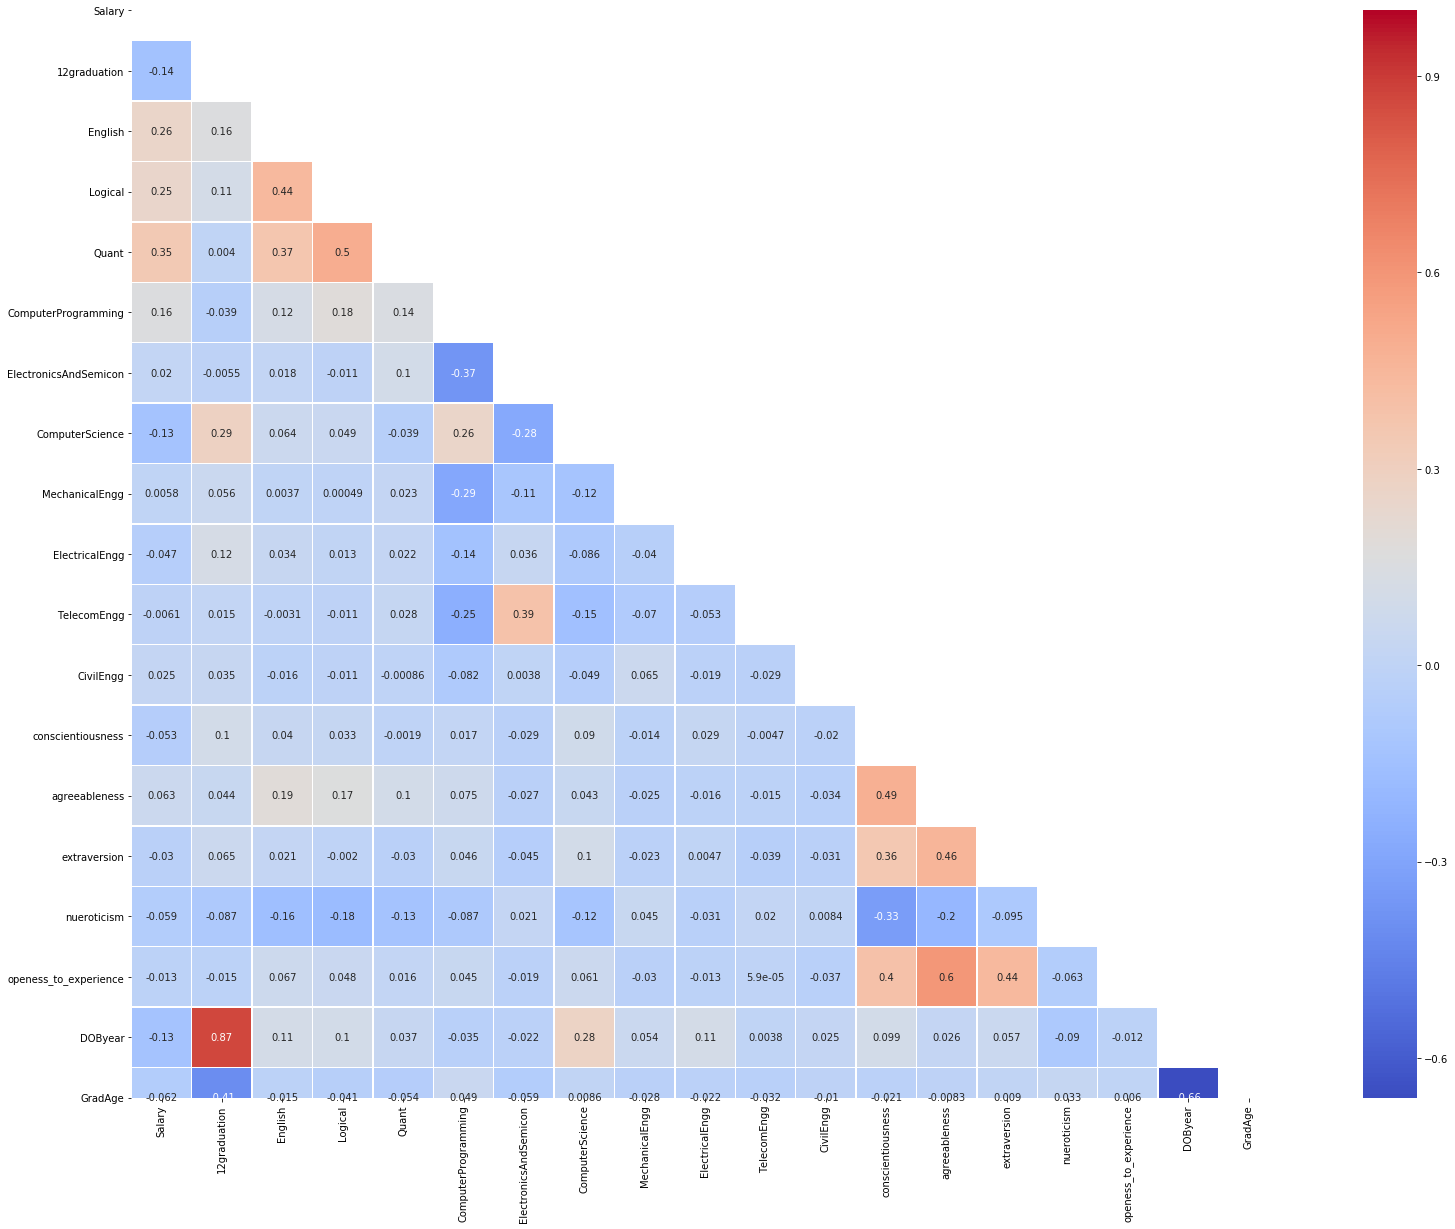

In [407]:
def corr_matrix(df):
    cr=df.corr()
    plt.figure(figsize=(30,20))
    mask=np.zeros_like(cr,dtype=np.bool)
    mask[np.triu_indices_from(mask)]=True
    sns.heatmap(cr,annot=True,mask=mask,square=True,linewidths=0.5,cmap='coolwarm')
    plt.show()
corr_matrix(df1)    

In [408]:
#Multicollinearity is less in our dataset.

# Creating Dummy data for categorical variables

In [409]:
categorical_features= ['Specialization', 'CollegeState', 'Gender', 'Degree','12board','10board','CollegeTier','CollegeCityTier']

In [410]:
for i in categorical_features:
    unique = len(df1[i].unique())
    print("{}: {}".format(i, unique))

Specialization: 3
CollegeState: 3
Gender: 2
Degree: 2
12board: 3
10board: 3
CollegeTier: 2
CollegeCityTier: 2


In [411]:
df2 = pd.get_dummies(df1, columns = categorical_features )


In [412]:
df1.shape

(3855, 30)

In [413]:
df2.shape

(3855, 42)

In [414]:
df2.columns

Index(['Salary', '10percentage', '12graduation', '12percentage', 'collegeGPA',
       'English', 'Logical', 'Quant', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'DOByear', 'GradAge', 'Specialization_CS', 'Specialization_EC',
       'Specialization_other', 'CollegeState_North_Zone.',
       'CollegeState_Other_Zone', 'CollegeState_South_Zone.', 'Gender_f',
       'Gender_m', 'Degree_PG', 'Degree_UG', '12board_cbse', '12board_icse',
       '12board_state', '10board_cbse', '10board_icse', '10board_state',
       'CollegeTier_1', 'CollegeTier_2', 'CollegeCityTier_0',
       'CollegeCityTier_1'],
      dtype='object')

In [415]:
df2

,Salary,10percentage,12graduation,12percentage,collegeGPA,English,Logical,Quant,ComputerProgramming,ElectronicsAndSemicon,...,12board_cbse,12board_icse,12board_state,10board_cbse,10board_icse,10board_state,CollegeTier_1,CollegeTier_2,CollegeCityTier_0,CollegeCityTier_1
0,420000,2,2007,2,2,515,585,525,445,0,...,0,0,1,0,0,1,0,1,1,0
1,500000,2,2007,2,1,695,610,780,0,466,...,1,0,0,1,0,0,0,1,1,0
2,325000,2,2010,1,1,615,545,370,395,0,...,1,0,0,1,0,0,0,1,1,0
4,200000,2,2008,2,1,545,625,465,0,233,...,1,0,0,1,0,0,0,1,1,0
5,300000,2,2010,2,2,560,555,620,645,0,...,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,0,2006,0,1,365,334,475,345,0,...,1,0,0,1,0,0,0,1,1,0
3994,100000,2,2009,2,2,415,410,535,325,420,...,0,0,1,0,0,1,0,1,0,1
3995,320000,2,2008,1,1,475,475,465,405,0,...,0,0,1,0,0,1,0,1,1,0
3996,200000,2,2010,1,1,450,410,320,445,0,...,0,0,1,0,0,1,0,1,0,1



(180000.0, 300000.0]     1142
(34999.999, 180000.0]    1007
(360000.0, 625000.0]      893
(300000.0, 360000.0]      813
Name: Salary, dtype: int64


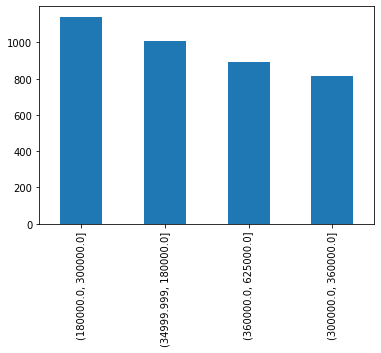

In [447]:
y_cat = pd.qcut(df2['Salary'], [0, .25, .5, .75, 1])

print()
print(y_cat.value_counts())
y_cat.value_counts().plot(kind = 'bar')
plt.show()


(180000.0, 360000.0]     1955
(34999.999, 180000.0]    1007
(360000.0, 625000.0]      893
Name: Salary, dtype: int64


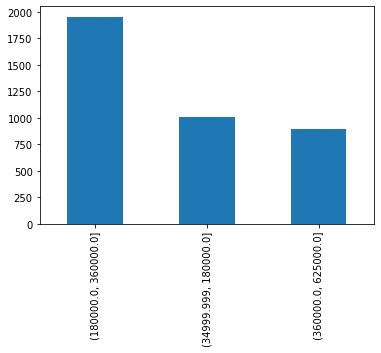

In [448]:
salary_cat = pd.qcut(df2['Salary'], [0, .25, .75, 1])

print()
print(salary_cat.value_counts())
salary_cat.value_counts().plot(kind = 'bar')
plt.show()

In [445]:
X= df2.drop('Salary', axis=1)
y_reg = df2['Salary']
y_cat = pd.qcut(df2['Salary'], [0, .25, .5, .75, 1])
salary_cat = pd.qcut(df2['Salary'], [0, .25, .75, 1])

In [449]:
X.to_csv('X.csv', index = False)
y_reg.to_csv('y_reg.csv', header = True, index = False, index_label = 'Salary')
y_cat.to_csv('y_cat.csv', header = True, index = False, index_label = 'Salary')
salary_cat.to_csv('salary_cat.csv', header = True, index = False, index_label = 'Salary')